In [1]:
# Carregar pacotes
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

# Ignore warning 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importar dados
df = pd.read_csv('../data/data_sus.csv', sep=",")

In [3]:
df.head()

,sexo_feminino,menos1ano,fxet_1a4anos,fxet_5a9anos,fxet_10a14anos,fxet_15a19anos,fxet_20a24anos,fxet_25a29anos,fxet_30a34anos,fxet_35a39anos,...,reabilitacao,hosp_dia,abrang2,abrang4,abrang5,plano_hospit,ac,mc,opm,cap_cid10
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0.0,0.0,0.0,1.0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0.0,0.0,0.0,1.0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0.0,0.0,0.0,1.0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0.0,1.0,0.0,1.0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0.0,0.0,0.0,1.0,0,0,0,0


# Pré processamento dos dados

In [4]:
#Data normalization
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [5]:
# Statistical data from normalized dataset
pd.DataFrame(df_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
count,4.122305e+06,4.122305e+06,4.122305e+06,4.122305e+06,4.122305e+06,4.122305e+06,4.122305e+06,4.122305e+06,4.122305e+06,4.122305e+06,...,4.122305e+06,4.122305e+06,4.122305e+06,4.122305e+06,4.122305e+06,4.122305e+06,4.122305e+06,4.122305e+06,4.122305e+06,4.122305e+06
mean,1.770620e-12,2.308132e-12,2.718996e-12,-1.142892e-12,-7.386602e-13,1.145664e-13,-1.382286e-12,1.484691e-12,-3.564500e-12,-4.118862e-12,...,2.617520e-13,-1.458707e-12,1.625796e-13,5.395855e-13,-4.533520e-16,6.645857e-14,2.484377e-12,-1.116589e-12,-6.381125e-13,-4.676139e-12
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.171052e+00,-1.635076e-01,-2.419767e-01,-1.956354e-01,-1.626359e-01,-2.273443e-01,-3.091866e-01,-3.233925e-01,-3.093480e-01,-2.817178e-01,...,-6.805614e-02,-1.148755e-01,-2.569175e-01,-1.001768e+00,-2.457347e-01,-4.205224e+00,-6.156832e-01,-1.614026e+00,-4.952218e-02,-1.763212e+00
25%,-1.171052e+00,-1.635076e-01,-2.419767e-01,-1.956354e-01,-1.626359e-01,-2.273443e-01,-3.091866e-01,-3.233925e-01,-3.093480e-01,-2.817178e-01,...,-6.805614e-02,-1.148755e-01,-2.569175e-01,-1.001768e+00,-2.457347e-01,2.377995e-01,-6.156832e-01,-1.614026e+00,-4.952218e-02,-7.694740e-01
50%,8.539328e-01,-1.635076e-01,-2.419767e-01,-1.956354e-01,-1.626359e-01,-2.273443e-01,-3.091866e-01,-3.233925e-01,-3.093480e-01,-2.817178e-01,...,-6.805614e-02,-1.148755e-01,-2.569175e-01,9.982348e-01,-2.457347e-01,2.377995e-01,-6.156832e-01,6.195686e-01,-4.952218e-02,5.864099e-02
75%,8.539328e-01,-1.635076e-01,-2.419767e-01,-1.956354e-01,-1.626359e-01,-2.273443e-01,-3.091866e-01,-3.233925e-01,-3.093480e-01,-2.817178e-01,...,-6.805614e-02,-1.148755e-01,-2.569175e-01,9.982348e-01,-2.457347e-01,2.377995e-01,1.624212e+00,6.195686e-01,-4.952218e-02,7.211330e-01
max,8.539328e-01,6.115925e+00,4.132629e+00,5.111548e+00,6.148704e+00,4.398615e+00,3.234293e+00,3.092217e+00,3.232605e+00,3.549652e+00,...,1.469375e+01,8.705075e+00,3.892301e+00,9.982348e-01,4.069429e+00,2.377995e-01,1.624212e+00,6.195686e-01,2.019297e+01,1.714871e+00


# Clustering data

In [6]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

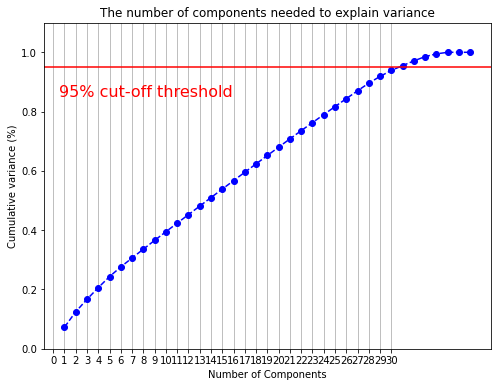

In [9]:
pca = PCA().fit(df_scaled)

plt.rcParams["figure.figsize"] = (8,6)

fig, ax = plt.subplots()
xi = np.arange(1, 38, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 31, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

The number of the components I choose is the number where the cumulative variance cuts the threshold for 95% of significance. In this case. the number of components must be 6.

In [31]:
#Create PCA object
pca = PCA(n_components = 3)
pca.fit(df_scaled)

PCA(n_components=3)

In [32]:
df_pca = pca.transform(df_scaled)

In [33]:
df_pca = pd.DataFrame(df_pca)
print(df_pca.shape)
df_pca.head()

(4122305, 3)


,0,1,2
0,1.509343,-0.037296,0.548685
1,2.159250,-0.299437,1.636341
2,1.601731,-0.041880,1.612947
3,1.828192,0.476692,0.548793
4,1.703626,-0.076592,1.038244


In [34]:
# Define seed for random state
seed = 123

# Create kmeans object with k-means++ property
kmeans = KMeans(n_clusters = 2, init='k-means++',max_iter = 600, random_state=seed)

# Fit kmeans into normalized data
kmeans.fit(df_pca)

KMeans(max_iter=600, n_clusters=2, random_state=123)

In [35]:
# inertia on the fitted data
kmeans.inertia_

16383104.312204473

In [36]:
SSE = []
for cluster in range(1,5):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(df_pca)
    SSE.append(kmeans.inertia_)

Text(0, 0.5, 'Inertia')

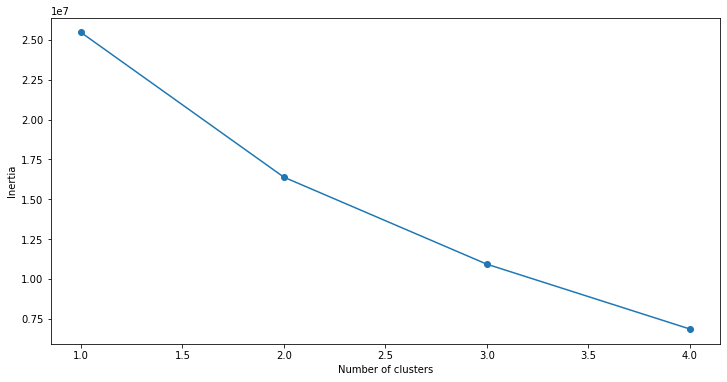

In [38]:
# Plot
frame = pd.DataFrame({'Cluster':range(1,5), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [19]:
# vamos reinstanciar o nosso modelo, agora com 5 clusters 
kmeans = KMeans(n_clusters = 5, init='k-means++', max_iter = 600, random_state=seed)
kmeans.fit(df_pca)
pred = kmeans.predict(df_pca)

In [20]:
df_final = pd.DataFrame(df)
df_final['cluster'] = pred
df_final['cluster'].value_counts()

0    1933910
3    1023331
1     530828
4     389553
2     244683
Name: cluster, dtype: int64

<AxesSubplot:ylabel='cluster'>

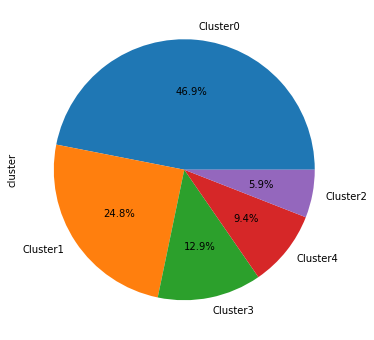

In [21]:
# Pie Chart 
df_final["cluster"].value_counts(bins = 5).plot(kind = 'pie', labels = ['Cluster0', 'Cluster1', 'Cluster3','Cluster4', 'Cluster2'], autopct="%.1f%%")

In [22]:
df_final.head()

,sexo_feminino,menos1ano,fxet_1a4anos,fxet_5a9anos,fxet_10a14anos,fxet_15a19anos,fxet_20a24anos,fxet_25a29anos,fxet_30a34anos,fxet_35a39anos,...,hosp_dia,abrang2,abrang4,abrang5,plano_hospit,ac,mc,opm,cap_cid10,cluster
0,1,0,0,0,0,0,0,0,0,0,...,0,0.0,0.0,0.0,1.0,0,0,0,0,3
1,1,0,0,0,0,0,0,0,0,0,...,0,0.0,0.0,0.0,1.0,0,0,0,0,3
2,1,0,0,0,0,0,0,0,0,0,...,0,0.0,0.0,0.0,1.0,0,0,0,0,3
3,0,0,0,0,0,0,0,0,0,0,...,0,0.0,1.0,0.0,1.0,0,0,0,0,3
4,1,0,0,0,0,0,0,0,0,0,...,0,0.0,0.0,0.0,1.0,0,0,0,0,3


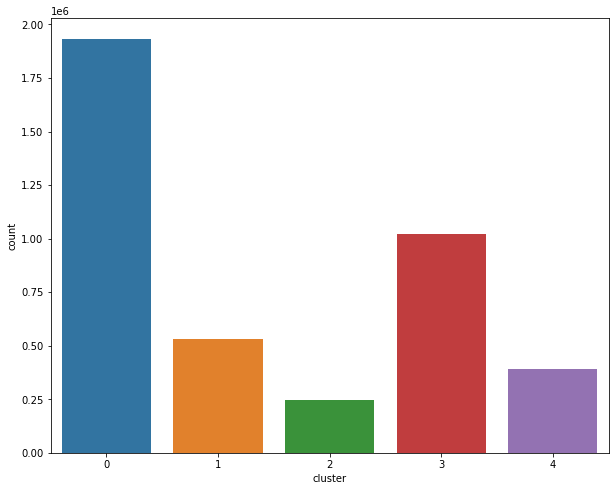

In [23]:
import seaborn as sns
#Plot the splited data by cluster

%matplotlib inline
fig,ax = plt.subplots(figsize=(10,8))

ax = sns.countplot(x="cluster", data=df_final)

In [39]:
# Exportar dataframe manipulado
df_final.to_csv('../data/data_custer.csv', index=False)

PermissionError: [Errno 13] Permission denied